In [266]:
import pandas as pd
import numpy as np

df=pd.read_csv('credit_card.csv')

In [267]:
df.shape

(772, 31)

In [268]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [269]:
import matplotlib.pyplot as plt

In [270]:
df['Class'].value_counts()

0    763
1      9
Name: Class, dtype: int64

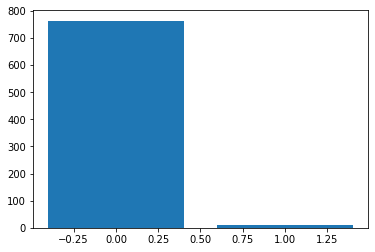

In [271]:

x=[0,1]
y=[df['Class'].value_counts()[0],df['Class'].value_counts()[1]]
plt.bar(x,y)
plt.show()

In [272]:
class0=df[df.Class==0]
class1=df[df.Class==1]


## Normalising the Columns

#### Normalising the amount column using min max scaling

In [273]:
df=(df-df.min())/(df.max()-df.min())

In [274]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,...,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000,772.000000
mean,0.487100,0.770416,0.709451,0.693944,0.566010,0.463275,0.424280,0.518687,0.772345,0.332918,...,0.439996,0.615838,0.524037,0.604936,0.595224,0.292449,0.493236,0.630614,0.017938,0.011658
std,0.295756,0.168598,0.067508,0.108988,0.144132,0.076769,0.142181,0.087536,0.086211,0.106713,...,0.064768,0.139539,0.053511,0.201625,0.170111,0.111795,0.061813,0.064563,0.051681,0.107411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.217728,0.676729,0.686907,0.634110,0.480627,0.426256,0.332662,0.475579,0.760887,0.273778,...,0.416757,0.517418,0.503665,0.482546,0.484145,0.214780,0.478606,0.626893,0.001564,0.000000
50%,0.485370,0.743636,0.713402,0.697141,0.578639,0.455475,0.393115,0.517968,0.781931,0.326613,...,0.431419,0.620536,0.522842,0.635556,0.606858,0.281091,0.493204,0.639447,0.004353,0.000000
75%,0.743546,0.938100,0.747915,0.763421,0.661269,0.495283,0.461852,0.565129,0.804533,0.386707,...,0.449590,0.708776,0.540510,0.744057,0.718536,0.347311,0.511485,0.654754,0.014505,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dropping the irrevalent column, that is   ```df['Time']```

In [275]:
df=df.drop(['Time'],axis=1)

### Using the SMOTE algorithm for balancing the dataset

In [276]:
from sklearn.model_selection import train_test_split

In [277]:
from imblearn.over_sampling import SMOTE

In [278]:
X=df.drop(['Class'],axis=1)
y=df['Class']

In [279]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
print('Training Examples: ',len(x_train))
print('Test Examples ',len(x_test))


Training Examples:  540
Test Examples  232


In [280]:
print("Number of counts of Label 1 before SMOTE: ",sum(y_train==1))
print("Number of counts of Label 0 before SMOTE: ",sum(y_train==0))


Number of counts of Label 1 before SMOTE:  7
Number of counts of Label 0 before SMOTE:  533


In [281]:
smSamp=SMOTE(random_state=5)
x_sam,y_sam=smSamp.fit_resample(X,y)

In [282]:
print("Number of counts of Label 1 after SMOTE: ",sum(y_sam==1))
print("Number of counts of label 0 after SMOTE: ",sum(y_sam==0))

Number of counts of Label 1 after SMOTE:  763
Number of counts of label 0 after SMOTE:  763


### Therefore, we have balanced the samplespace

##### We will apply Simple Random Sample in Sample 1

In [283]:
import random

In [284]:
newdf=pd.concat([x_sam,y_sam],axis=1)

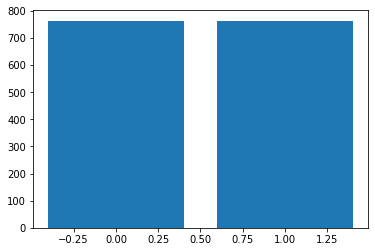

In [285]:
class0=newdf[newdf.Class==0]
class1=newdf[newdf.Class==1]
x=[0,1]
y=[newdf['Class'].value_counts()[0],newdf['Class'].value_counts()[1]]
plt.bar(x,y)
plt.show()

In [286]:
sample1=newdf.sample(int(newdf.shape[0]/2))

sample1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
592,0.709506,0.735084,0.758770,0.682085,0.470025,0.428491,0.554282,0.809314,0.285655,0.245543,...,0.445246,0.713256,0.528838,0.671741,0.486866,0.229257,0.570753,0.680954,0.012218,0.0
613,0.743101,0.706885,0.678884,0.369031,0.465939,0.284760,0.580058,0.762665,0.388005,0.133447,...,0.454697,0.730608,0.526941,0.645178,0.473026,0.313579,0.511865,0.666042,0.014368,0.0
1303,0.566055,0.566226,0.844286,0.659830,0.620360,0.459720,0.306904,0.852099,0.444167,0.211054,...,0.478497,0.876675,0.572502,0.358074,0.476730,0.472165,0.464483,0.598544,0.000388,1.0
1358,0.951190,0.713759,0.623513,0.593253,0.458538,0.361000,0.503157,0.777956,0.316440,0.221640,...,0.413456,0.477641,0.546394,0.563324,0.622085,0.314039,0.485685,0.639137,0.000703,1.0
133,0.684961,0.741762,0.878154,0.832487,0.427489,0.470596,0.538570,0.799782,0.246859,0.257599,...,0.459535,0.794069,0.510194,0.812131,0.672424,0.350022,0.472323,0.636271,0.020875,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,0.752713,0.743853,0.749933,0.541380,0.467721,0.286245,0.584114,0.759396,0.341146,0.218025,...,0.404768,0.449391,0.530027,0.695524,0.453731,0.298681,0.501712,0.605169,0.002871,0.0
480,0.703986,0.742432,0.838354,0.808853,0.488774,0.438239,0.516668,0.819765,0.152060,0.290972,...,0.423937,0.476741,0.543188,0.650518,0.498665,0.254579,0.486100,0.633096,0.002973,0.0
989,0.952449,0.714773,0.625641,0.596878,0.454927,0.345820,0.505772,0.773615,0.320051,0.220177,...,0.412612,0.472900,0.546901,0.593318,0.625572,0.313044,0.485396,0.639644,0.000541,1.0
696,0.695143,0.667169,0.787410,0.458396,0.460891,0.348655,0.501153,0.790673,0.425857,0.148245,...,0.434204,0.591961,0.570171,0.640812,0.364407,0.455624,0.484852,0.652467,0.020778,0.0


 * Using Logistic Regression as classification model
 * Using Accuracy Score as metric
 * Using Simple Random Sampling for sampling

In [287]:
##Applying Machine Learning Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
xs1=sample1.drop(['Class'],axis=1)
ys1=sample1['Class']
xs1_train,xs1_test,ys1_train,ys1_test=train_test_split(xs1,ys1,test_size=0.3)
model1=LogisticRegression()
model1.fit(xs1_train,ys1_train)
ypred1=model1.predict(xs1_test)
print('Accuracy Score: ',accuracy_score(ys1_test,ypred1))

Accuracy Score:  0.8253275109170306


### Stratified Sampling

 * Using Decision Tree Classifier as classification model
 * Using Accuracy Score as metric
 * Using Stratified Sampling for sampling

In [288]:
## Dividing the df into class 0 and 1
class0=newdf[newdf.Class==0]
class1=newdf[newdf.Class==1]

In [289]:
##Using Stratified Random Sampling for sample 2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

sample2=class0.sample((class0.shape[0]//2))
sample2=pd.concat([sample2,class1.sample(class1.shape[0]//2)],axis=0)
xs2=sample2.drop(['Class'],axis=1)
ys2=sample2['Class']
xs2_train,xs2_test,ys2_train,ys2_test=train_test_split(xs2,ys2,test_size=0.3)
model2=RandomForestClassifier()
model2.fit(xs2_train,ys2_train)
ypred2=model2.predict(xs2_test)
print('Accuracy Score: ',accuracy_score(ys2_test,ypred2))


Accuracy Score:  0.9912663755458515


### Using Systematic Sampling

Considering the size of the population data to be N, and the size of sample to be taken be n, according to the systematic sampling :

``` Interval=(N/n)```

In [290]:
#We define the step
step=4
indexes=np.arange(0,newdf.shape[0],step=step)
# Here, we have defined all the indexes of sample to be taken

sample3=newdf.iloc[indexes]
sample3

## We will use SVM Classifier for this sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.616386,0.692769,0.869399,0.691108,0.439976,0.459464,0.530632,0.788571,0.380816,0.246943,...,0.437531,0.701974,0.513576,0.627460,0.600847,0.243528,0.515872,0.629684,0.039085,0.0
4,0.642635,0.747455,0.765085,0.579454,0.435161,0.416954,0.566932,0.750227,0.435979,0.304066,...,0.438474,0.821569,0.509551,0.651576,0.468394,0.403156,0.533509,0.684476,0.018284,0.0
8,0.677006,0.713420,0.589552,0.502214,0.650254,0.837564,0.544043,0.866707,0.288970,0.203712,...,0.431672,0.576521,0.499590,0.933921,0.697713,0.198498,0.490852,0.667600,0.024347,0.0
12,0.956234,0.626673,0.642059,0.391905,0.359784,0.318450,0.435193,0.754697,0.082154,0.353285,...,0.414837,0.527070,0.542685,0.733187,0.613752,0.205232,0.493865,0.644408,0.031739,0.0
16,0.937120,0.694638,0.735364,0.680910,0.412175,0.439243,0.445810,0.797989,0.431676,0.215999,...,0.436860,0.683168,0.532114,0.639408,0.694187,0.198936,0.507502,0.643162,0.003393,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.949395,0.712753,0.620358,0.586991,0.465328,0.386514,0.499440,0.784540,0.308373,0.223834,...,0.414924,0.487792,0.545500,0.514418,0.617965,0.315634,0.486362,0.638304,0.000671,1.0
1512,0.805433,0.716210,0.705383,0.568848,0.500698,0.347001,0.548975,0.774137,0.312716,0.206461,...,0.431589,0.601058,0.517360,0.617566,0.662144,0.246810,0.476420,0.621075,0.000474,1.0
1516,0.634019,0.702931,0.710838,0.484663,0.512471,0.356467,0.530444,0.786799,0.339706,0.230181,...,0.418420,0.568711,0.500983,0.560854,0.454779,0.336899,0.428900,0.562108,0.000337,1.0
1520,0.952990,0.715130,0.626575,0.598627,0.453087,0.338621,0.506892,0.771683,0.322117,0.219531,...,0.412203,0.470265,0.547149,0.607275,0.626917,0.312586,0.485225,0.639881,0.000518,1.0


In [291]:
from sklearn.svm import SVC
xs3=sample3.drop(['Class'],axis=1)
ys3=sample3['Class']
xs3_train,xs3_test,ys3_train,ys3_test=train_test_split(xs3,ys3)

model3=SVC()
model3.fit(xs3_train,ys3_train)
ypred3=model3.predict(xs3_test)
accuracy_score(ys3_test,ypred3)

0.9375

### Using Cluster Sampling

Here, we make random clusters from the population dataset and choose n clusters to create the sample

In [292]:
import random

In [293]:
# newdf=newdf.sort_values(by='Amount')
clusters=[]
sample4=pd.DataFrame()
takenCluster=[]
nClusters=10
for i in range(nClusters):
    clusters.append(newdf.sample(100))


while(len(takenCluster)!=5):
    clusterChoice=random.randint(0,9)
    if clusterChoice not in takenCluster:
        sample4 = pd.concat([sample4,clusters[clusterChoice]],axis=0)
        takenCluster.append(clusterChoice)
sample4

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1070,0.539429,0.561113,0.858531,0.658757,0.630889,0.466711,0.303485,0.855637,0.446912,0.209782,...,0.482623,0.903077,0.570635,0.346399,0.474341,0.471887,0.463033,0.595375,0.000386,1.0
828,0.954411,0.715657,0.629147,0.604254,0.446708,0.316054,0.509829,0.766228,0.330289,0.217728,...,0.410879,0.460155,0.547962,0.649752,0.629658,0.311215,0.484527,0.640608,0.000703,1.0
583,0.682704,0.752382,0.776252,0.465514,0.500970,0.389708,0.602486,0.768310,0.306596,0.157699,...,0.417115,0.519435,0.470368,0.473925,0.795916,0.333675,0.460624,0.645312,0.004127,0.0
899,0.794364,0.745066,0.555648,0.722065,0.454060,0.343545,0.412512,0.833042,0.202242,0.148724,...,0.442184,0.538268,0.516589,0.567904,0.599721,0.320311,0.505356,0.625590,0.000465,1.0
895,0.858566,0.718608,0.686439,0.592222,0.470706,0.288691,0.543650,0.758415,0.331771,0.205809,...,0.422001,0.537335,0.529157,0.721815,0.660833,0.265102,0.478024,0.629144,0.000311,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.945714,0.695101,0.708364,0.688301,0.402383,0.368640,0.460469,0.783840,0.442118,0.225771,...,0.448355,0.742039,0.510013,0.738014,0.800698,0.237819,0.499999,0.641294,0.002604,0.0
406,0.939737,0.687168,0.696437,0.713355,0.412774,0.432117,0.452324,0.807961,0.479266,0.222300,...,0.427789,0.630729,0.523453,0.619486,0.766596,0.229343,0.500915,0.638673,0.001306,0.0
1332,0.433918,0.555289,0.718726,0.722356,0.552042,0.301717,0.538208,0.775967,0.311430,0.181201,...,0.490453,0.706983,0.682418,0.514389,0.608036,0.272906,0.432411,0.621807,0.108332,1.0
613,0.743101,0.706885,0.678884,0.369031,0.465939,0.284760,0.580058,0.762665,0.388005,0.133447,...,0.454697,0.730608,0.526941,0.645178,0.473026,0.313579,0.511865,0.666042,0.014368,0.0


* Using lightgbm as Classifier

In [294]:
from lightgbm import LGBMClassifier
xs4=sample4.drop(['Class'],axis=1)
ys4=sample4['Class']
xs4_train,xs4_test,ys4_train,ys4_test=train_test_split(xs4,ys4)

model4=LGBMClassifier()
model4.fit(xs4_train,ys4_train)
ypred4=model4.predict(xs4_test)
accuracy_score(ys4_test,ypred4)

0.984

### Using the Multistage sampling

In [295]:
subSample=pd.DataFrame()
subSample=pd.concat([subSample,class0.sample(class0.shape[0]//2)],axis=0)
subSample=pd.concat([subSample,class1.sample(class1.shape[0]//2)],axis=0)
sample5=subSample.sample(subSample.shape[0]//2)
sample5

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
596,0.761882,0.748227,0.724533,0.650716,0.514599,0.482794,0.584152,0.777851,0.341151,0.250206,...,0.422327,0.648987,0.484902,0.303616,0.546547,0.243991,0.541689,0.627461,0.003132,0.0
1156,0.852240,0.713110,0.658941,0.570871,0.462665,0.306211,0.520535,0.766289,0.338661,0.219540,...,0.412055,0.488417,0.533461,0.666375,0.578246,0.318049,0.466030,0.615871,0.000317,1.0
147,0.872523,0.641875,0.681939,0.715371,0.381324,0.407129,0.488862,0.794182,0.426880,0.226087,...,0.457146,0.661264,0.482768,0.782156,0.741671,0.210903,0.488121,0.648972,0.070213,0.0
511,0.945415,0.698513,0.655784,0.631888,0.427313,0.326812,0.513721,0.758821,0.378582,0.219132,...,0.417926,0.536698,0.526209,0.752579,0.734936,0.347812,0.483543,0.639328,0.010666,0.0
1119,0.534475,0.553979,0.861268,0.663660,0.635031,0.474068,0.290048,0.859818,0.452708,0.210780,...,0.484108,0.911156,0.574392,0.329094,0.463752,0.485339,0.462917,0.595057,0.000392,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.924537,0.692866,0.638223,0.685558,0.450118,0.423855,0.506898,0.793539,0.349229,0.241857,...,0.437325,0.633789,0.512011,0.614630,0.785075,0.209919,0.492828,0.638066,0.017756,0.0
1001,0.778766,0.716944,0.721449,0.565912,0.506818,0.337828,0.558480,0.771712,0.314046,0.203063,...,0.434588,0.621482,0.512183,0.640293,0.670708,0.233880,0.474526,0.617927,0.000431,1.0
127,0.708132,0.720539,0.737670,0.496086,0.501774,0.365248,0.572613,0.782067,0.346174,0.167595,...,0.422924,0.528425,0.511182,0.461829,0.545159,0.320245,0.498664,0.662004,0.008493,0.0
1335,0.957005,0.717409,0.633625,0.612567,0.438002,0.281791,0.515209,0.756978,0.339977,0.214631,...,0.408936,0.447774,0.549139,0.716294,0.636189,0.309028,0.483728,0.641738,0.000571,1.0


In [296]:
from xgboost import XGBClassifier
xs5=sample5.drop(['Class'],axis=1)
ys5=sample5['Class']
xs5_train,xs5_test,ys5_train,ys5_test=train_test_split(xs5,ys5)

model5=XGBClassifier()
model5.fit(xs5_train,ys5_train)
ypred5=model5.predict(xs5_test)
accuracy_score(ys5_test,ypred5)

0.9895833333333334

## Compiling the models and samples

* Now lets the check the accuracy of every sample on each model

In [297]:
samples=[sample1,sample2,sample3,sample4,sample5]
models=[model1,model2,model3,model4,model5]

modelDict={
    model1:'Logistic Regression',
    model2:'Random Forest',
    model3:'SVM Classifier',
    model4:'Light GBM',
    model5:'XGBoost'
}

sampleNames=[
    'Simple Random Sampling',
    'Stratified Sampling',
    'Systematic Sampling',
    'Cluster Sampling',
    'Multistage Sampling'
]

In [298]:
accuracies=[]
for count,k in enumerate(samples):
    kx=k.drop(['Class'],axis=1)
    ky=k['Class']
    
    indAccuracy=[]
    kx_train,kx_test,ky_train,ky_test=train_test_split(kx,ky,test_size=0.3)
    for countx, x in enumerate(models):
        x.fit(kx_train,ky_train)
        kypred=x.predict(kx_test)
        indAccuracy.append(accuracy_score(ky_test,kypred))
    accuracies.append(indAccuracy)
print(accuracies)

[[0.834061135371179, 0.982532751091703, 0.9082969432314411, 0.9781659388646288, 0.9737991266375546], [0.851528384279476, 0.9912663755458515, 0.9039301310043668, 0.9737991266375546, 0.982532751091703], [0.7652173913043478, 0.991304347826087, 0.8608695652173913, 0.9652173913043478, 0.9565217391304348], [0.8066666666666666, 0.9933333333333333, 0.8933333333333333, 0.98, 0.9866666666666667], [0.808695652173913, 0.991304347826087, 0.8521739130434782, 0.9739130434782609, 0.9652173913043478]]


In [299]:
finalres=pd.DataFrame(accuracies)
finalres.columns=[mname for mname in modelDict.values()]
finalres.index=sampleNames
finalres

,Logistic Regression,Random Forest,SVM Classifier,Light GBM,XGBoost
Simple Random Sampling,0.834061,0.982533,0.908297,0.978166,0.973799
Stratified Sampling,0.851528,0.991266,0.903930,0.973799,0.982533
Systematic Sampling,0.765217,0.991304,0.860870,0.965217,0.956522
Cluster Sampling,0.806667,0.993333,0.893333,0.980000,0.986667
Multistage Sampling,0.808696,0.991304,0.852174,0.973913,0.965217
